<h2> CNN MNSIT Assignment </h2>

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

<h2>K1 : 3x3 kernel</h2>

**T1 : 2 Convo Layer**

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 167s 3ms/step - loss: 0.2510 - acc: 0.9237 - val_loss: 0.0608 - val_acc: 0.9807
Epoch 2/5
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0867 - acc: 0.9742 - val_loss: 0.0403 - val_acc: 0.9857
Epoch 3/5
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0624 - acc: 0.9810 - val_loss: 0.0395 - val_acc: 0.9871
Epoch 4/5
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0504 - acc: 0.9849 - val_loss: 0.0327 - val_acc: 0.9886
Epoch 5/5
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0421 - acc: 0.9867 - val_loss: 0.0281 - val_acc: 0.9911
Test loss: 0.028134288165755424
Test accuracy: 0.9911


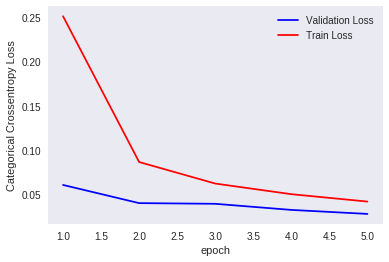

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal'))

model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**T2 : 4 Conv layer**

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.4876 - acc: 0.8455 - val_loss: 0.0495 - val_acc: 0.9840
Epoch 2/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.1222 - acc: 0.9652 - val_loss: 0.0324 - val_acc: 0.9895
Epoch 3/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.0835 - acc: 0.9754 - val_loss: 0.0281 - val_acc: 0.9915
Epoch 4/5
60000/60000 [==============================] - 213s 4ms/step - loss: 0.0672 - acc: 0.9804 - val_loss: 0.0252 - val_acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0588 - acc: 0.9830 - val_loss: 0.0251 - val_acc: 0.9925
Test loss: 0.025063415565206016
Test accuracy: 0.9925


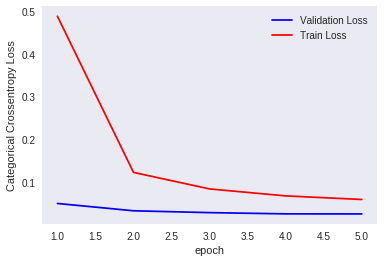

In [0]:
model1 = Sequential()
model1.add(Conv2D(18, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal'))

model1.add(Conv2D(48, (3, 3), activation='relu',kernel_initializer='he_normal'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Conv2D(74, (3, 3), activation='relu',kernel_initializer='he_normal'))
model1.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**T3 : 7 layer**

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 318s 5ms/step - loss: 0.4448 - acc: 0.8539 - val_loss: 0.0543 - val_acc: 0.9836
Epoch 2/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1003 - acc: 0.9705 - val_loss: 0.0383 - val_acc: 0.9897
Epoch 3/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.0701 - acc: 0.9797 - val_loss: 0.0352 - val_acc: 0.9890
Epoch 4/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.0591 - acc: 0.9835 - val_loss: 0.0285 - val_acc: 0.9913
Epoch 5/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.0506 - acc: 0.9856 - val_loss: 0.0240 - val_acc: 0.9927
Test loss: 0.024014955987941358
Test accuracy: 0.9927


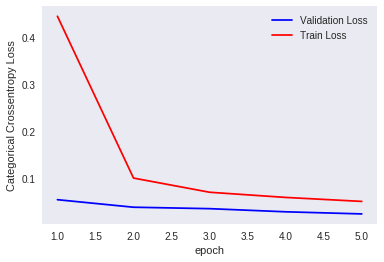

In [0]:
model1 = Sequential()
model1.add(Conv2D(10, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal'))
model1.add(Conv2D(20, (3, 3), activation='relu',kernel_initializer='he_normal'))
model1.add(Conv2D(35, (3, 3), activation='relu',kernel_initializer='he_normal'))
model1.add(Conv2D(55, (3, 3), activation='relu',kernel_initializer='he_normal'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Conv2D(74, (3, 3), activation='relu',kernel_initializer='he_normal'))
model1.add(Conv2D(95, (3, 3), activation='relu',kernel_initializer='he_normal'))
model1.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>K2 : 5x5 kernel</h2>

**T1 : 2 Layers**

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 251s 4ms/step - loss: 0.2285 - acc: 0.9307 - val_loss: 0.0525 - val_acc: 0.9829
Epoch 2/5
60000/60000 [==============================] - 251s 4ms/step - loss: 0.0725 - acc: 0.9788 - val_loss: 0.0347 - val_acc: 0.9880
Epoch 3/5
60000/60000 [==============================] - 251s 4ms/step - loss: 0.0526 - acc: 0.9846 - val_loss: 0.0282 - val_acc: 0.9906
Epoch 4/5
60000/60000 [==============================] - 250s 4ms/step - loss: 0.0444 - acc: 0.9867 - val_loss: 0.0296 - val_acc: 0.9895
Epoch 5/5
60000/60000 [==============================] - 252s 4ms/step - loss: 0.0344 - acc: 0.9898 - val_loss: 0.0289 - val_acc: 0.9908
Test loss: 0.028865598604393018
Test accuracy: 0.9908


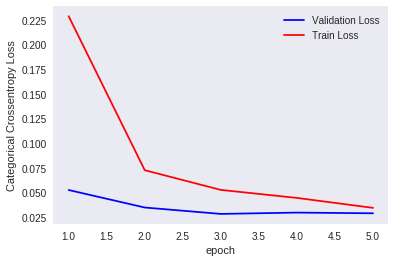

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal'))

model.add(Conv2D(64, (5, 5), activation='relu',kernel_initializer='he_normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**T2 : 4 layers**

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 238s 4ms/step - loss: 0.4460 - acc: 0.8593 - val_loss: 0.0600 - val_acc: 0.9825
Epoch 2/5
60000/60000 [==============================] - 237s 4ms/step - loss: 0.1152 - acc: 0.9691 - val_loss: 0.0314 - val_acc: 0.9904
Epoch 3/5
60000/60000 [==============================] - 236s 4ms/step - loss: 0.0805 - acc: 0.9789 - val_loss: 0.0340 - val_acc: 0.9913
Epoch 4/5
60000/60000 [==============================] - 236s 4ms/step - loss: 0.0689 - acc: 0.9820 - val_loss: 0.0326 - val_acc: 0.9900
Epoch 5/5
60000/60000 [==============================] - 234s 4ms/step - loss: 0.0555 - acc: 0.9854 - val_loss: 0.0213 - val_acc: 0.9934
Test loss: 0.0213252486387064
Test accuracy: 0.9934


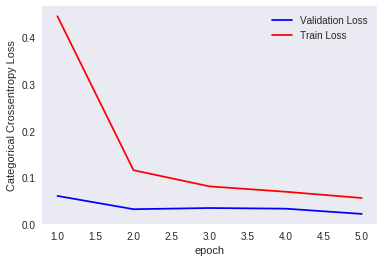

In [0]:
model1 = Sequential()
model1.add(Conv2D(18, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal'))

model1.add(Conv2D(48, (5, 5), activation='relu',kernel_initializer='he_normal'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Conv2D(74, (5, 5), activation='relu',kernel_initializer='he_normal'))
model1.add(Conv2D(128, (5, 5), activation='relu',kernel_initializer='he_normal'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**T3 : 7 Layers**

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 349s 6ms/step - loss: 0.4301 - acc: 0.8580 - val_loss: 0.0470 - val_acc: 0.9857
Epoch 2/5
60000/60000 [==============================] - 347s 6ms/step - loss: 0.0953 - acc: 0.9720 - val_loss: 0.0343 - val_acc: 0.9878
Epoch 3/5
60000/60000 [==============================] - 347s 6ms/step - loss: 0.0717 - acc: 0.9790 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 4/5
60000/60000 [==============================] - 347s 6ms/step - loss: 0.0587 - acc: 0.9836 - val_loss: 0.0272 - val_acc: 0.9906
Epoch 5/5
60000/60000 [==============================] - 346s 6ms/step - loss: 0.0495 - acc: 0.9861 - val_loss: 0.0258 - val_acc: 0.9920
Test loss: 0.025778980856500402
Test accuracy: 0.992


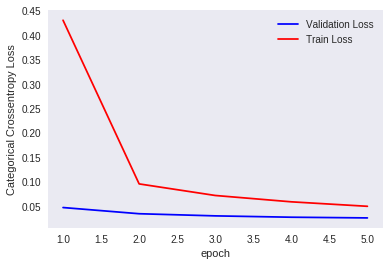

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=input_shape,kernel_initializer='he_normal'))
model2.add(Conv2D(32, (5, 5), activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
model2.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
model2.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(1, 1)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same',activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(1, 1)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>K3 : 7x7 kernel</h2>

T1 : 2 Layers

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 309s 5ms/step - loss: 0.2215 - acc: 0.9331 - val_loss: 0.0428 - val_acc: 0.9856
Epoch 2/5
60000/60000 [==============================] - 306s 5ms/step - loss: 0.0723 - acc: 0.9792 - val_loss: 0.0292 - val_acc: 0.9910
Epoch 3/5
60000/60000 [==============================] - 307s 5ms/step - loss: 0.0515 - acc: 0.9850 - val_loss: 0.0308 - val_acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 307s 5ms/step - loss: 0.0410 - acc: 0.9880 - val_loss: 0.0258 - val_acc: 0.9917
Epoch 5/5
60000/60000 [==============================] - 307s 5ms/step - loss: 0.0326 - acc: 0.9904 - val_loss: 0.0212 - val_acc: 0.9935
Test loss: 0.021209821229708905
Test accuracy: 0.9935


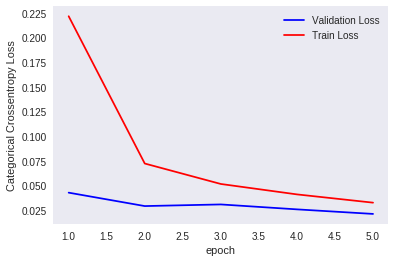

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal'))

model.add(Conv2D(64, (7, 7), activation='relu',kernel_initializer='he_normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**T2 : 4 layers**

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1655s 28ms/step - loss: 0.3568 - acc: 0.8889 - val_loss: 0.0460 - val_acc: 0.9862
Epoch 2/5
60000/60000 [==============================] - 1656s 28ms/step - loss: 0.0886 - acc: 0.9764 - val_loss: 0.0334 - val_acc: 0.9892
Epoch 3/5
60000/60000 [==============================] - 1650s 27ms/step - loss: 0.0628 - acc: 0.9832 - val_loss: 0.0196 - val_acc: 0.9943
Epoch 4/5
60000/60000 [==============================] - 1633s 27ms/step - loss: 0.0523 - acc: 0.9857 - val_loss: 0.0230 - val_acc: 0.9930
Epoch 5/5
60000/60000 [==============================] - 1635s 27ms/step - loss: 0.0417 - acc: 0.9888 - val_loss: 0.0247 - val_acc: 0.9928
Test loss: 0.0246878

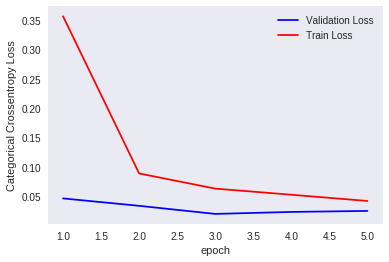

In [0]:
model1 = Sequential()
model1.add(Conv2D(18, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal', padding='same'))

model1.add(Conv2D(48, (7, 7), activation='relu',kernel_initializer='he_normal', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Conv2D(74, (7, 7), activation='relu',kernel_initializer='he_normal', padding='same'))
model1.add(Conv2D(128, (7, 7), activation='relu',kernel_initializer='he_normal', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**T3 : 7 layers**

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1060s 18ms/step - loss: 0.4036 - acc: 0.8621 - val_loss: 0.0537 - val_acc: 0.9851
Epoch 2/5
60000/60000 [==============================] - 1064s 18ms/step - loss: 0.0805 - acc: 0.9782 - val_loss: 0.0384 - val_acc: 0.9888
Epoch 3/5
60000/60000 [==============================] - 1063s 18ms/step - loss: 0.0564 - acc: 0.9854 - val_loss: 0.0282 - val_acc: 0.9922
Epoch 4/5
60000/60000 [==============================] - 1060s 18ms/step - loss: 0.0522 - acc: 0.9873 - val_loss: 0.0333 - val_acc: 0.9905
Epoch 5/5
60000/60000 [==============================] - 1068s 18ms/step - loss: 0.0460 - acc: 0.9888 - val_loss: 0.0419 - val_acc: 0.9894
Test loss: 0.04188694998633478
Test accuracy: 0.9894


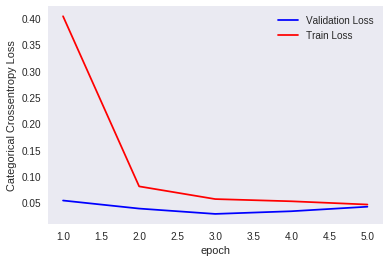

In [4]:
model2 = Sequential()
model2.add(Conv2D(32, (7, 7), padding='same', activation='relu', input_shape=input_shape,kernel_initializer='he_normal'))
model2.add(Conv2D(32, (7, 7), activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (7, 7), padding='same', activation='relu',kernel_initializer='he_normal'))
model2.add(Conv2D(64, (7, 7), padding='same', activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (7, 7), padding='same', activation='relu',kernel_initializer='he_normal'))
model2.add(Conv2D(64, (7, 7),padding='same', activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(1, 1)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (7, 7), padding='same',activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(1, 1)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> **Conclusion** </h2>

STEPS : 

*   Load and Divide data in train and test
*   Normalize the data and convert itno categorical data
*   Create a sequential model .
*   Add Convolution layer with  'm' layers and initalizer =He-Normal 
*   Add Kernel Size and Add activation(relU)
*   Add Same Padding
*   Add MaxPool layer 
*   Add Dropout layer
*   Flatten the Output from the above model
*   Add Fully Connected layer
*   Add Softmax layer and Optimizer is Adam
*   Loss is Categorical Crossentropy Loss

**NOTE : I have Used only 5 epochs as each epoch was taking more than 5 mins thereby increasing overall model run time.**

In [10]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Kernel Size","Trail","Hidden layers","Test Accuracy"]

x.add_row(["3 x 3","T1", 2, 99.11])
x.add_row(["3 x 3","T2", 4, 99.25])
x.add_row(["3 x 3","T3", 7, 99.27])
x.add_row(["-","-", "-" , "-" ])
x.add_row(["5 x 5","T2", 2, 99.08])
x.add_row(["5 x 5","T1", 4, 99.34])
x.add_row(["5 x 5","T3", 7, 99.2])
x.add_row(["-","-", "-" , "-" ])
x.add_row(["7 x 7","T2", 2, 99.35])
x.add_row(["7 x 7","T1", 4, 99.28])
x.add_row(["7 x 7","T3", 7, 98.95])

print(x)

+-------------+-------+---------------+---------------+
| Kernel Size | Trail | Hidden layers | Test Accuracy |
+-------------+-------+---------------+---------------+
|    3 x 3    |   T1  |       2       |     99.11     |
|    3 x 3    |   T2  |       4       |     99.25     |
|    3 x 3    |   T3  |       7       |     99.27     |
|      -      |   -   |       -       |       -       |
|    5 x 5    |   T2  |       2       |     99.08     |
|    5 x 5    |   T1  |       4       |     99.34     |
|    5 x 5    |   T3  |       7       |      99.2     |
|      -      |   -   |       -       |       -       |
|    7 x 7    |   T2  |       2       |     99.35     |
|    7 x 7    |   T1  |       4       |     99.28     |
|    7 x 7    |   T3  |       7       |     98.95     |
+-------------+-------+---------------+---------------+



*   Even with 5 epochs (7x7) kernel cnn is giving 99% accuracy, hence increasing no. of epochs will increase accuracy preety well
*   Padding and kernel Initializer are important paramter
*   Dense CNN takes time to compile